In [2]:
import pandas as pd
import openpyxl
from datetime import datetime

# Read the dataset
df = pd.read_excel('Final Lead Data.xlsx') 

In [3]:
df.head()

,ID,First Name,Email,Gender,City,Created,Position,New College Name,Colleges,Academic Year,Branch/ Specialisation,Other Branch,What is your current academic year?,Company Name/ College Name,Would you like to know more about us and our programs?,Are you interested in knowing more about our events?,Have you recommended Cloud Counselage to anyone?,How did you come to know about this event?
0,68112,ANIKET,aniket@xyz.com,NaN,NaN,04/27/2022 01:41:38 pm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,no,NaN
1,68110,Dhanshree,dhanshree@xyz.com,NaN,NaN,04/22/2022 04:08:38 pm,NaN,Lords Universal College,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,no,NaN
2,68108,Dhiraj,dhiraj@xyz.com,NaN,NaN,04/16/2022 10:31:59 pm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,no,NaN
3,68106,Pooja,pooja@xyz.com,NaN,NaN,04/13/2022 10:05:15 pm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,no,NaN
4,68090,Aayush,aayush@xyz.com,NaN,NaN,03/26/2022 07:02:48 pm,NaN,B.k Birla college,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,no,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 18 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   ID                                                      5303 non-null   int64  
 1   First Name                                              5303 non-null   object 
 2   Email                                                   5303 non-null   object 
 3   Gender                                                  200 non-null    object 
 4   City                                                    55 non-null     object 
 5   Created                                                 5303 non-null   object 
 6   Position                                                6 non-null      object 
 7   New College Name                                        1818 non-null   object 
 8   Colleges                              

In [9]:
df['Academic Year'].value_counts()

3.0    1221
2.0     672
4.0     457
1.0     168
Name: Academic Year, dtype: int64

In [6]:
df['What is your current academic year?'].value_counts()

3rd Year      59
Final Year    41
2nd Year      20
1st Year      11
Name: What is your current academic year?, dtype: int64

In [7]:
# Map categorical values in "What is your current academic year?" column to numerical values
academic_year_mapping = {
    '1st Year': 1,
    '2nd Year': 2,
    '3rd Year': 3,
    'Final Year': 4
}

In [8]:
df['What is your current academic year?'] = df['What is your current academic year?'].map(academic_year_mapping)

In [9]:
df['What is your current academic year?'].value_counts()

3.0    59
4.0    41
2.0    20
1.0    11
Name: What is your current academic year?, dtype: int64

In [23]:
# Convert the academic years to integers
df['Academic Year'] = df['Academic Year'].astype(int)

In [24]:
# Fill missing values in "Academic Year" with corresponding values from "What is your current academic year?"
missing_academic_year_mask = df['Academic Year'].isnull()
not_null_current_academic_year_mask = df['What is your current academic year?'].notnull()
df.loc[missing_academic_year_mask & not_null_current_academic_year_mask, 'Academic Year'] = df['What is your current academic year?']

In [25]:
df['Academic Year'].value_counts()

3    3992
2     674
4     465
1     172
Name: Academic Year, dtype: int64

In [26]:
df['Academic Year'].isna().sum()

0

In [27]:
# Handle remaining missing values in "Academic Year" column
median_academic_year = df['Academic Year'].median()
df['Academic Year'].fillna(median_academic_year, inplace=True)

In [28]:
# Assuming standard course duration is 4 years
course_duration_years = 4

In [29]:
df['Academic Year'].isna().sum()

0

In [30]:
# Calculate the year of graduation based on the academic year and course duration
current_year = datetime.now().year
df['Year of Graduation'] = current_year + course_duration_years - df['Academic Year']

In [31]:
df['Year of Graduation']

0       2024
1       2024
2       2024
3       2024
4       2024
        ... 
5298    2024
5299    2024
5300    2024
5301    2024
5302    2024
Name: Year of Graduation, Length: 5303, dtype: int32

In [34]:
df['Year of Graduation'].value_counts()

2024    3992
2025     674
2023     465
2026     172
Name: Year of Graduation, dtype: int64

In [35]:
# Save the updated DataFrame to a new Excel file
output_file_path = 'Updated Lead Data.xlsx'
df.to_excel(output_file_path, index=False)

In [36]:
print(f"Data saved to {output_file_path}")

Data saved to Updated Lead Data.xlsx


In [42]:
import matplotlib.pyplot as plt

In [44]:
year_of_graduation_counts = df['Year of Graduation'].value_counts()

([<matplotlib.patches.Wedge at 0x177f6d566b0>,
 [Text(0.10544296220517319, -1.0949346015728056, '2024'),
  Text(0.3054345677540066, 1.0567448721526513, '2025'),
  Text(-0.4216625184385474, 1.015972795179114, '2023'),
  Text(-0.7663556777328516, 0.789112777242025, '2026')],
 [Text(0.05751434302100354, -0.5972370554033485, '75.3%'),
  Text(0.16660067332036724, 0.576406293901446, '12.7%'),
  Text(-0.22999773733011675, 0.5541669791886076, '8.8%'),
  Text(-0.4180121878542827, 0.4304251512229227, '3.2%')])

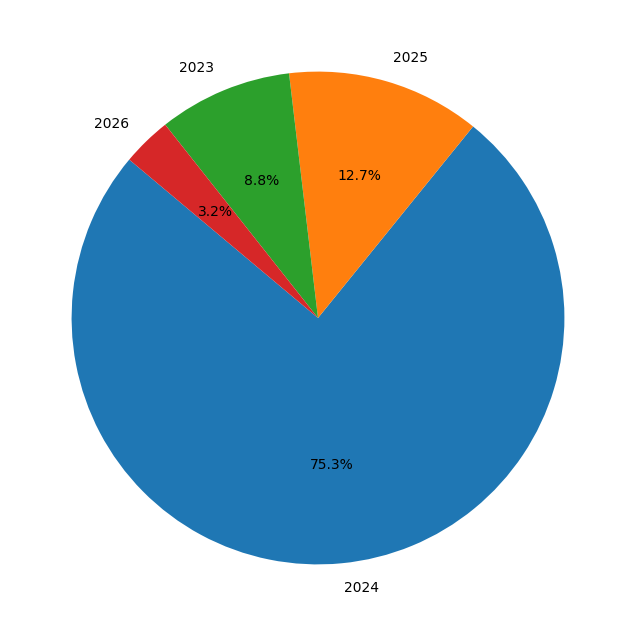

In [45]:
plt.figure(figsize=(8, 8))
plt.pie(year_of_graduation_counts, labels=year_of_graduation_counts.index, autopct='%1.1f%%', startangle=140)